In [2]:
!pip install gdown
import gdown

In [3]:
dataset = '1GCmHooX1xOvyIsvdDvGrMBzmJeC4zB0D'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GCmHooX1xOvyIsvdDvGrMBzmJeC4zB0D
To: /dataset.csv
100%|██████████| 3.75M/3.75M [00:00<00:00, 52.0MB/s]


'/dataset.csv'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [5]:
df = pd.read_csv(output_path)
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [6]:
df = df.rename(columns={'y': 'target'})

In [7]:
print(df['target'].unique())

['no' 'yes']


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10747,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,-1,0,unknown
26054,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,-1,0,unknown
9125,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,-1,0,unknown
41659,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success
4443,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,-1,0,unknown


In [10]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown
33409,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown
31885,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure
15738,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown


In [11]:
y_train.head()

,target
10747,no
26054,no
9125,no
41659,no
4443,no


In [12]:
y_test.head()

,target
3776,no
9928,no
33409,no
31885,no
15738,no


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on X_train and transform both X_train and X_test
X_train_encoded = enc.fit_transform(X_train[categorical_cols]).toarray()
X_test_encoded = enc.transform(X_test[categorical_cols]).toarray()

# Combine encoded features with numerical features
# Assuming X_train has numerical features
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number'])

X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)

In [14]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [15]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# show unique values and their count in y_test

unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"Value: {value}, Count: {count}")

Value: 0, Count: 11966
Value: 1, Count: 1598


**Class Imbalance**

In [17]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Assuming 'y' contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(y_train)
print("Class weights:", class_weights)

Class weights: {0: 0.5660144512805838, 1: 4.2870495800596045}


In [18]:
#fit X_train and y_train into Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.5660144512805838, 1: 4.2870495800596045})

In [19]:
print(model.coef_)
print(model.intercept_)

[[ 5.67676171e-04 -2.83218958e-01 -3.25507520e-02 -4.19692549e-03
   5.05805654e-02  1.71537109e-01 -1.11893989e-02 -9.64599139e-02
   6.45077029e-02 -5.84723936e-02  8.91093717e-03  1.42907331e-03
   4.07925465e-03 -2.21586882e-01  2.89523494e-02 -1.08233707e-01
  -2.35826016e-01  1.41312381e-01  1.41920637e-02 -1.63208405e-01
  -2.53468730e-02  5.20480646e-01 -7.09035923e-01  3.23908810e-02
  -2.20946159e-01  2.37339535e-01  7.90991501e-02 -5.04993963e-01
   1.15402216e-01  4.81898755e-03  3.71946462e-02  3.31768352e-02
  -2.08477651e-02 -1.19974414e-01 -5.85943070e-02  1.26286199e-01
  -4.81370479e-01 -6.58418491e-02  1.47238843e-01  9.39558088e-02
  -1.39464512e-01 -2.51706613e-02  3.54808750e-01 -3.78728855e-01
  -1.31865021e-02  2.02355323e-05 -1.48852802e-02  5.30827880e-03
  -1.28772009e-01 -4.92565635e-05  2.54607782e-01]]
[-0.18856778]


In [20]:
X_test

array([[  0.,   1.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   0., ...,   2.,  -1.,   0.],
       [  0.,   0.,   0., ...,   1.,  -1.,   0.],
       ...,
       [  1.,   0.,   0., ...,   3.,  -1.,   0.],
       [  0.,   0.,   0., ...,   4.,  -1.,   0.],
       [  0.,   0.,   0., ...,   2., 234.,   5.]])

In [21]:
X_train

array([[ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  1., ...,  3., -1.,  0.],
       [ 0.,  1.,  0., ...,  2., -1.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  1.,  0., ..., 10., -1.,  0.]])

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8070628133294013


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11966
           1       0.36      0.81      0.50      1598

    accuracy                           0.81     13564
   macro avg       0.66      0.81      0.69     13564
weighted avg       0.90      0.81      0.84     13564

[[9657 2309]
 [ 308 1290]]


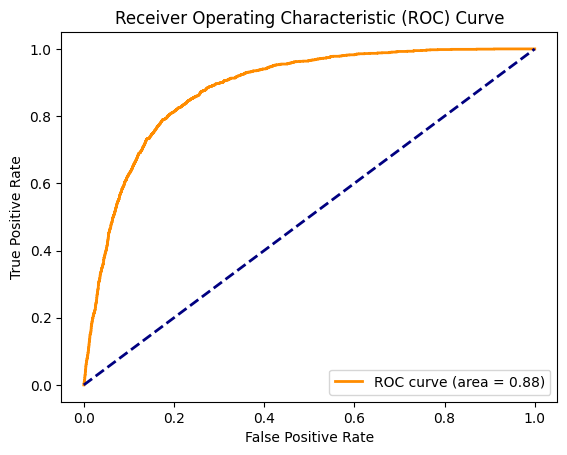

In [27]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

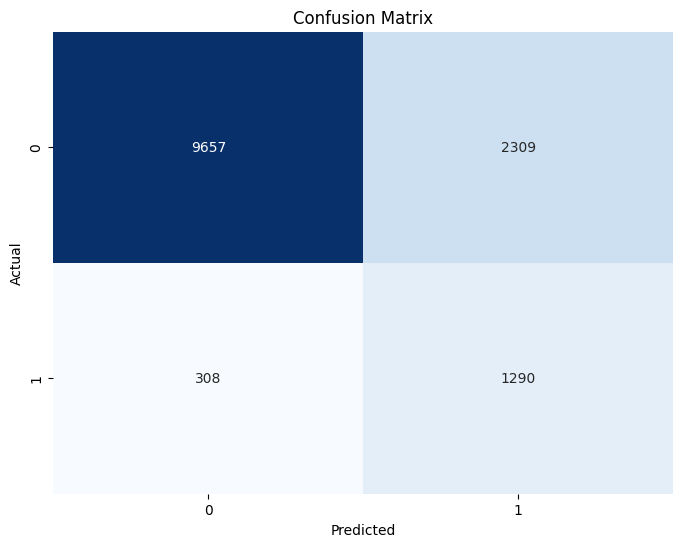

In [32]:
# Visualize the confusion matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.4964402539926881


In [38]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

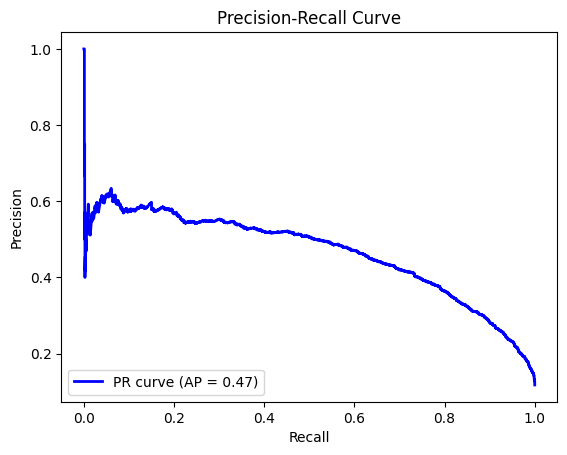

In [39]:
# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='PR curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated accuracy scores: [0.81042654 0.80552923 0.80107442 0.80707853 0.8108706 ]
Mean CV accuracy: 0.8069958617232993 ± 0.0035778332182112194


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Key components added:**

**Confusion Matrix:** Visualizes the results in terms of true positives, true negatives, false positives, and false negatives.

**F1 Score:** Evaluates the balance between precision and recall.
ROC Curve and AUC: Visualizes the tradeoff between true positive rate and false positive rate.

**Precision-Recall Curve:** Provides additional insight into the performance for imbalanced datasets.

**Cross-Validation**: Ensures model consistency across different subsets of the data.